In [1]:
import warnings

warnings.filterwarnings("ignore")

import numpy as np

import tensorflow as tf

import matplotlib.pyplot as plt


In [15]:
from tensorflow.examples.tutorials.mnist import input_data

In [16]:
input_data

<module 'tensorflow.examples.tutorials.mnist.input_data' from 'C:\\Users\\Home\\AppData\\Local\\conda\\conda\\envs\\tf15\\lib\\site-packages\\tensorflow\\examples\\tutorials\\mnist\\input_data.py'>

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

log_dir ='./tf/logs'


In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


[21019 17249  5759 54152 24510]


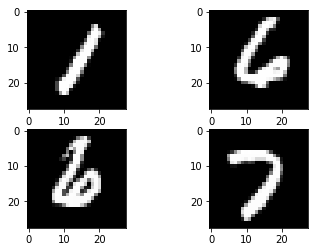

In [4]:
random_samples = np.random.randint(0,x_train.shape[0],5)
print(random_samples)
plt.subplot(221)
plt.imshow(x_train[random_samples[0]], cmap='gray')
plt.subplot(222)
plt.imshow(x_train[random_samples[1]], cmap='gray')
plt.subplot(223)
plt.imshow(x_train[random_samples[2]], cmap='gray')

plt.subplot(224)
plt.imshow(x_train[random_samples[3]], cmap='gray')
plt.show()

In [5]:
no_of_samples=x_train.shape[0]
pixels = x_train.shape[1]*x_train.shape[2]
print(no_of_samples)
print(pixels)

60000
784


In [6]:
x_train=x_train.reshape(no_of_samples,pixels).astype('float32')
x_test=x_test.reshape(x_test.shape[0],pixels).astype('float32')

In [7]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [8]:
def weight_variable(shape):
        initial = tf.truncated_normal(shape, stddev=0.1)
        return tf.Variable(initial)

In [9]:
def bias_variable(shape):
    """Create a bias variable with appropriate initialization."""
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

In [10]:
def variable_summaries(var):
    """Attach a lot of summaries to a Tensor (for TensorBoard visualization)."""
    with tf.name_scope('summaries'):
        mean = tf.reduce_mean(var)
        tf.summary.scalar('mean', mean)
        with tf.name_scope('stddev'):
            stddev = tf.sqrt(tf.reduce_mean(tf.square(var - mean)))
            tf.summary.scalar('stddev', stddev)
            tf.summary.scalar('max', tf.reduce_max(var))
            tf.summary.scalar('min', tf.reduce_min(var))
            tf.summary.histogram('histogram', var)

In [11]:
def nn_layer(input_tensor, input_dim, output_dim, layer_name, act=tf.nn.relu):
    """Reusable code for making a simple neural net layer.
    It does a matrix multiply, bias add, and then uses ReLU to nonlinearize.
    It also sets up name scoping so that the resultant graph is easy to read,
    and adds a number of summary ops.
    """
        # Adding a name scope ensures logical grouping of the layers in the graph.
    with tf.name_scope(layer_name):
        # This Variable will hold the state of the weights for the layer
        with tf.name_scope('weights'):
            weights = weight_variable([input_dim, output_dim])
            variable_summaries(weights)

        with tf.name_scope('biases'):
            biases = bias_variable([output_dim])
            variable_summaries(biases)

        with tf.name_scope('Wx_plus_b'):
            preactivate = tf.matmul(input_tensor, weights) + biases
            tf.summary.histogram('pre_activations', preactivate)
            activations = act(preactivate, name='activation')
            tf.summary.histogram('activations', activations)
        return activations

In [12]:
num_epochs=10
keep_proba=1.0

In [17]:
with tf.Graph().as_default() as g:
    
    with tf.name_scope('input'):
        x = tf.placeholder(tf.float32, [None, 784], name='x-input')
        y_ = tf.placeholder(tf.int64, [None], name='y-input')
        
    with tf.name_scope('input_reshape'):
        image_shaped_input = tf.reshape(x, [-1, 28, 28, 1])
        tf.summary.image('input', image_shaped_input, 10)
    
    hidden1 = nn_layer(x, 784, 500, 'layer1')
    
    with tf.name_scope('dropout'):
        keep_prob = tf.placeholder(tf.float32)
        tf.summary.scalar('dropout_keep_probability', keep_prob)
        dropped = tf.nn.dropout(hidden1, keep_prob)
    
    
    y = nn_layer(dropped, 500, 10, 'layer2', act=tf.identity)
    
    with tf.name_scope('cross_entropy'):
        with tf.name_scope('total'):
            cross_entropy = tf.losses.sparse_softmax_cross_entropy(labels=y_, logits=y)
        
    tf.summary.scalar('cross_entropy', cross_entropy)
    
    
    with tf.name_scope('accuracy'):
        with tf.name_scope('correct_prediction'):
            correct_prediction = tf.equal(tf.argmax(y, 1), y_)
        with tf.name_scope('accuracy'):
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
            
            
    tf.summary.scalar('accuracy', accuracy)
    
    merged = tf.summary.merge_all()
    
    
    #test_writer = tf.summary.FileWriter(log_dir + '/test')
    
    

In [ ]:
x_train.shape

In [ ]:
num_epochs

In [14]:
with tf.Session(graph=g) as sess:
    
    tf.global_variables_initializer().run()
    
    train_writer = tf.summary.FileWriter(log_dir + '/train', sess.graph)
    
    feed_dict={x:x_train, y_:y_train,keep_prob: keep_proba}
    
    for epoch in range(num_epochs):
        summary,   = sess.run([merged, accuracy], feed_dict=feed_dict)
        
        print("Accuracy for epoch ",epoch," is ",acc)
        
        run_metadata = tf.RunMetadata()
        train_writer.add_run_metadata(run_metadata, 'step%03d' % epoch)
        train_writer.add_summary(summary, epoch)
        
        
        

Accuracy for epoch  0  is  0.13488333
Accuracy for epoch  1  is  0.13488333
Accuracy for epoch  2  is  0.13488333
Accuracy for epoch  3  is  0.13488333
Accuracy for epoch  4  is  0.13488333
Accuracy for epoch  5  is  0.13488333
Accuracy for epoch  6  is  0.13488333
Accuracy for epoch  7  is  0.13488333
Accuracy for epoch  8  is  0.13488333
Accuracy for epoch  9  is  0.13488333
